Read image from devie

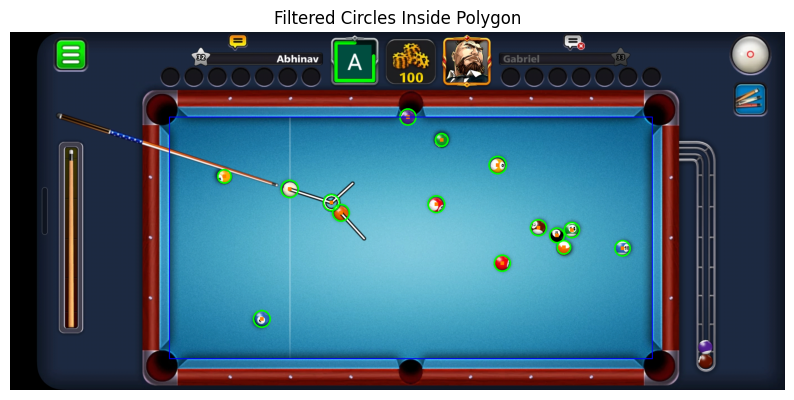

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('./media/Screenshot_20250511_225753_8 Ball Pool.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Coordinates of the quadrilateral (crop area)
crop_image = [(481, 256), (1939, 256), (1939, 985), (481, 985)]
polygon = np.array(crop_image, dtype=np.int32)

# Detect circles
circles = cv2.HoughCircles(
    blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
    param1=50, param2=30, minRadius=10, maxRadius=50
)

# Filter circles inside the polygon
filtered_circles = []
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        if cv2.pointPolygonTest(polygon, (float(x), float(y)), False) >= 0:
            filtered_circles.append((x, y, r))

# Draw filtered circles
for (x, y, r) in filtered_circles:
    cv2.circle(image, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# Optional: Draw polygon boundary
cv2.polylines(image, [polygon], isClosed=True, color=(255, 0, 0), thickness=2)

# Convert to RGB for displaying in Jupyter
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show result
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title("Filtered Circles Inside Polygon")
plt.axis("off")
plt.show()
